Future Value of State Pension Investment and the Tax Benefit: 2 235 600.84 CZK and 0.00 CZK
Future Value of ETF Investment: 2 011 900.57 CZK

The State Pension investment is better by 223 700.27 CZK.


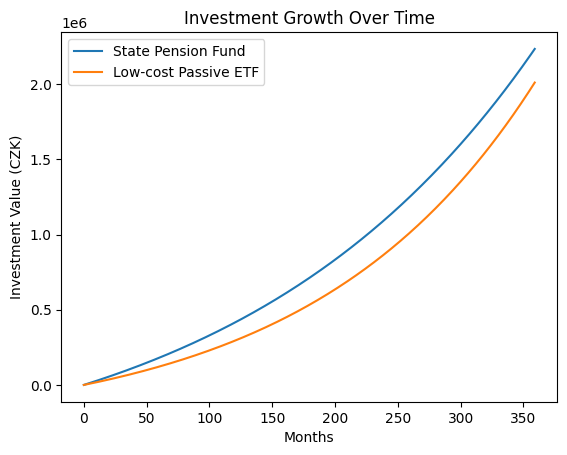

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-provided input values
monthly_contribution = 1700.0  # User-defined monthly contribution
company_contribution = 600.0   # User-defined company contribution
investment_period = 30         # Investment period in years
ter_pension = 0.01 + 0.00      # TER of State Pension Fund + Difference in performance to Index ETFs
ter_etf = 0.0015               # TER of Low-cost Passive ETF
expected_market_return = 0.07  # Expected annual return of stock market
performance_fee_rate = 0.15    # State Pension Fund performance fee

# Hisotrical data for reference:
    # Pension Fund return in 2023:       14.98 % 
    # FTSE All-World return in 2023:     17.78 %
    # S&P 500 return in 2023:            21.54 %

# State contributions as a dictionary
state_contributions_table = {
    500: 100, 600: 120, 700: 140, 800: 160, 900: 180, 1000: 200, 1100: 220, 1200: 240, 1300: 260, 1400: 280, 1500: 300, 1600: 320, 1700: 340
}

# Tax benefit table
tax_benefit_table = {
    2000: 540, 3000: 2340, 4000: 4140, 5000: 5940, 5700: 7200
}

def get_state_contribution(personal_contribution):
    """Return state contribution based on personal contribution."""
    for amount, contribution in reversed(state_contributions_table.items()):
        if personal_contribution >= amount:
            return contribution
    return 0

def calculate_future_value(monthly_contribution, employer_contribution, state_contribution, investment_period, annual_return, ter, performance_fee_rate):
    """Calculate future value of an investment."""
    adjusted_return = (annual_return - ter) / 12  # Monthly adjusted return
    future_values = np.zeros(investment_period * 12)
    for month in range(1, investment_period * 12):
        future_values[month] = (future_values[month-1] + monthly_contribution + employer_contribution + state_contribution) * (1 + (adjusted_return * (1-performance_fee_rate) ) )
    return future_values

def calculate_tax_benefit(personal_contribution, investment_period):
    """Get monthly tax benefit based on contribution."""
    for amount, benefit in reversed(tax_benefit_table.items()):
        if personal_contribution >= amount:
            return benefit * investment_period
    return 0

def format_currency(value):
    """Format the value as a currency string."""
    return f"{value:,.2f} CZK".replace(",", " ")

def plot_investment_growth(state_pension_values, etf_values):
    """Plot the growth of investments over time."""
    plt.plot(state_pension_values, label="State Pension Fund")
    plt.plot(etf_values, label="Low-cost Passive ETF")
    plt.xlabel("Months")
    plt.ylabel("Investment Value (CZK)")
    plt.title("Investment Growth Over Time")
    plt.legend()
    plt.show()

def compare_investments(pension_values, etf_values):
    # Comparing final values
    final_pension_value = pension_values[-1]
    final_etf_value = etf_values[-1]

    if final_etf_value > final_pension_value:
        print(f"The ETF investment is better by {format_currency(final_etf_value - final_pension_value)}.")
        # Find the year when ETF investment outruns pension fund
        for month, (pension_val, etf_val) in enumerate(zip(pension_values, etf_values)):
            if etf_val > pension_val:
                outrun_year = month // 12
                print(f"The ETF option outruns the State Pension Fund in year {outrun_year}.")
                break
    else:
        print(f"The State Pension investment is better by {format_currency(final_pension_value - final_etf_value)}.")


def main():
    # State contribution
    state_contribution = get_state_contribution(monthly_contribution)

    # Calculate future values
    pension_future_values = calculate_future_value(monthly_contribution, company_contribution, state_contribution, investment_period, expected_market_return, ter_pension, performance_fee_rate)
    etf_future_values = calculate_future_value(monthly_contribution, 0, 0, investment_period, expected_market_return, ter_etf, 0)

    # Tax benefits
    tax_benefit = calculate_tax_benefit(monthly_contribution, investment_period)

    # Final values
    final_pension_value = pension_future_values[-1]
    final_etf_value = etf_future_values[-1]

    print(f"Future Value of State Pension Investment and the Tax Benefit: {format_currency(final_pension_value)} and {format_currency(tax_benefit)}")
    print(f"Future Value of ETF Investment: {format_currency(final_etf_value)}\n")

    compare_investments(pension_future_values, etf_future_values)

    # Plotting investment growth
    plot_investment_growth(pension_future_values, etf_future_values)

main()
